In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

2024-11-18 23:04:47.790194: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 23:04:48.076023: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 23:04:48.336954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731992688.569901   68349 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731992688.623660   68349 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 23:04:49.146173: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Cargar el modelo guardado
model = tf.keras.models.load_model('./modelo_clasificacion_frutas.h5')
print("Modelo cargado exitosamente.")

2024-11-18 23:04:53.199939: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2024-11-18 23:04:53.301955: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.
2024-11-18 23:04:53.329501: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.
2024-11-18 23:04:53.344931: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.
2024-11-18 23:04:53.639910: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.


Modelo cargado exitosamente.


In [48]:
# Ruta de la imagen de prueba
img_path = 'Naranja2.jpg'

In [49]:
# Cargar y preprocesar la imagen
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)  # Convierte a arreglo de NumPy
img_array = np.expand_dims(img_array, axis=0)  # Añade una dimensión para batch
img_array /= 255.0  # Normaliza como en el entrenamiento

In [50]:
# Realizar la predicción
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Clase con la probabilidad más alta

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


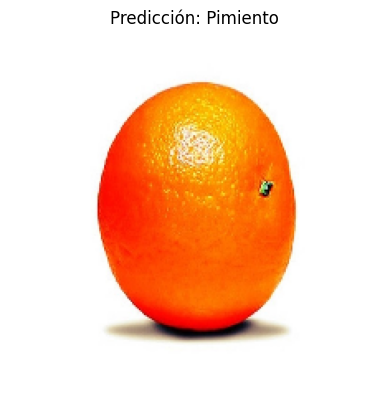

In [51]:
# Mapeo de nombre de las clases
class_names = ['Manzana', 'Platano', 'Calabaza amarga', 'Pimiento', 'Naranja', 'Tomate', 'Manzana', 'Platano', 'Calabaza amarga', 'Pimiento', 'Naranja', 'Tomate']

# Mostrar la imagen y la predicción
plt.imshow(img)
plt.title(f'Predicción: {class_names[predicted_class]}')
plt.axis('off')
plt.show()

In [52]:
print("Probabilidades de predicción:", predictions[0])

Probabilidades de predicción: [2.6177606e-06 5.2575094e-13 5.8736734e-13 3.1081856e-07 1.5707366e-02
 8.1094844e-12 1.5714302e-04 5.1889011e-16 5.4515516e-07 9.8161638e-01
 2.5131546e-03 2.3425632e-06]
